In [7]:
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
df=pd.read_csv("/content/sample_data/creditcard.csv")

In [10]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [11]:
df.shape

(75671, 31)

In [12]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75671 entries, 0 to 75670
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    75671 non-null  int64  
 1   V1      75671 non-null  float64
 2   V2      75671 non-null  float64
 3   V3      75671 non-null  float64
 4   V4      75671 non-null  float64
 5   V5      75671 non-null  float64
 6   V6      75671 non-null  float64
 7   V7      75671 non-null  float64
 8   V8      75671 non-null  float64
 9   V9      75671 non-null  float64
 10  V10     75671 non-null  float64
 11  V11     75671 non-null  float64
 12  V12     75671 non-null  float64
 13  V13     75671 non-null  float64
 14  V14     75671 non-null  float64
 15  V15     75671 non-null  float64
 16  V16     75671 non-null  float64
 17  V17     75670 non-null  float64
 18  V18     75670 non-null  float64
 19  V19     75670 non-null  float64
 20  V20     75670 non-null  float64
 21  V21     75670 non-null  float64
 22

In [14]:
df["Class"].value_counts()

0.0    75486
1.0      184
Name: Class, dtype: int64

In [16]:
non_fraud = df[df['Class']==0]
fraud = df[df['Class']==1]

In [17]:
non_fraud.shape, fraud.shape

((75486, 31), (184, 31))

In [18]:
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(184, 31)

In [19]:
df = fraud.append(non_fraud, ignore_index=True)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
1,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0
2,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1.0
3,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1.0
4,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,46083,-0.795755,0.440031,2.043941,-1.388290,-0.357002,-0.086266,0.197000,0.398692,0.009195,-0.659577,1.281673,0.055513,-1.292995,0.271253,0.456777,0.771275,-0.626860,-0.026542,-0.829247,0.024125,-0.051250,-0.246427,-0.057119,0.020412,0.047432,0.819550,0.126226,0.014257,30.00,0.0
364,55059,1.193228,0.156830,0.606373,0.655208,-0.518735,-0.727202,-0.058484,-0.046243,0.130158,-0.088819,0.172256,0.171530,-0.496637,0.433498,1.340525,-0.050434,0.016104,-1.007658,-0.595510,-0.182300,-0.216674,-0.630139,0.215027,0.374861,0.076107,0.106484,-0.016984,0.017375,1.98,0.0
365,311,1.182238,-0.147518,1.248518,0.862034,-1.076728,-0.299690,-0.614840,0.064575,0.907341,-0.244554,-0.705757,0.523098,0.199033,-0.437902,0.182824,0.155472,-0.183114,-0.254955,-0.041502,-0.091273,-0.090194,-0.057346,0.030121,0.438310,0.259808,0.315896,0.017962,0.027611,8.58,0.0
366,53167,-7.917748,-5.989647,-0.706832,2.133132,-1.408025,-0.125536,-0.835730,1.010677,-0.620578,0.884091,0.777950,0.858188,0.537689,0.450344,0.917638,-0.813977,0.460783,1.882998,-0.406698,-1.054960,-0.536171,-0.319266,-1.742833,0.250993,0.033812,-0.182814,0.616136,-1.139326,215.98,0.0


In [20]:
df['Class'].value_counts()

0.0    184
1.0    184
Name: Class, dtype: int64

In [21]:
X = df.drop('Class', axis = 1)
y = df['Class']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 0, stratify = y)

In [23]:
X_train.shape, X_test.shape

((294, 30), (74, 30))

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
y_train = np.array(y_train)
y_test=np.array(y_test)


In [26]:
X_train.shape

(294, 30)

In [27]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [28]:
X_train.shape, X_test.shape

((294, 30, 1), (74, 30, 1))

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.4.1


In [30]:
epochs = 20
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0

In [32]:
model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [33]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
10/10 [==============================] - 2s 39ms/step - loss: 1.2459 - accuracy: 0.4910 - val_loss: 0.6576 - val_accuracy: 0.6486
Epoch 2/20
10/10 [==============================] - 0s 13ms/step - loss: 0.6538 - accuracy: 0.7520 - val_loss: 0.6297 - val_accuracy: 0.7432
Epoch 3/20
10/10 [==============================] - 0s 12ms/step - loss: 0.5710 - accuracy: 0.7639 - val_loss: 0.6064 - val_accuracy: 0.7838
Epoch 4/20
10/10 [==============================] - 0s 13ms/step - loss: 0.5476 - accuracy: 0.7658 - val_loss: 0.5886 - val_accuracy: 0.7838
Epoch 5/20
10/10 [==============================] - 0s 12ms/step - loss: 0.2949 - accuracy: 0.8706 - val_loss: 0.5749 - val_accuracy: 0.8243
Epoch 6/20
10/10 [==============================] - 0s 12ms/step - loss: 0.5029 - accuracy: 0.7935 - val_loss: 0.5607 - val_accuracy: 0.8514
Epoch 7/20
10/10 [==============================] - 0s 12ms/step - loss: 0.4278 - accuracy: 0.8200 - val_loss: 0.5461 - val_accuracy: 0.8649
Epoch 8/20
10

In [34]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

In [ ]:
plot_learningCurve(history, epochs)

Epoch 1/50
10/10 [==============================] - 1s 30ms/step - loss: 1.2361 - accuracy: 0.5305 - val_loss: 0.6574 - val_accuracy: 0.7162
Epoch 2/50
10/10 [==============================] - 0s 10ms/step - loss: 1.0460 - accuracy: 0.5787 - val_loss: 0.6417 - val_accuracy: 0.7568
Epoch 3/50
10/10 [==============================] - 0s 9ms/step - loss: 0.7468 - accuracy: 0.7026 - val_loss: 0.6290 - val_accuracy: 0.7703
Epoch 4/50
10/10 [==============================] - 0s 10ms/step - loss: 0.8456 - accuracy: 0.6531 - val_loss: 0.6165 - val_accuracy: 0.7432
Epoch 5/50
10/10 [==============================] - 0s 9ms/step - loss: 0.6632 - accuracy: 0.7526 - val_loss: 0.6045 - val_accuracy: 0.7432
Epoch 6/50
10/10 [==============================] - 0s 9ms/step - loss: 0.6724 - accuracy: 0.7027 - val_loss: 0.5929 - val_accuracy: 0.7297
Epoch 7/50
10/10 [==============================] - 0s 10ms/step - loss: 0.6395 - accuracy: 0.7244 - val_loss: 0.5827 - val_accuracy: 0.7432
Epoch 8/50
10/10

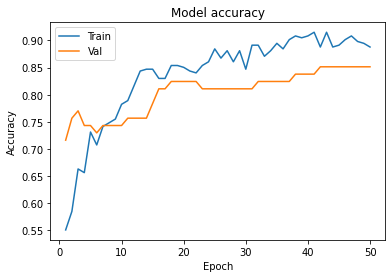

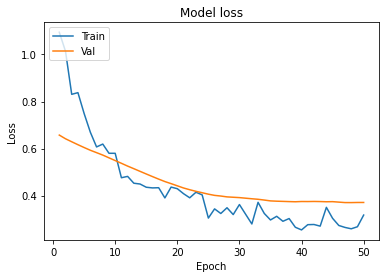

In [36]:
epochs = 50
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)
plot_learningCurve(history, epochs)